In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load the dataset
df = pd.read_csv('BodyFat-extended.csv')

In [3]:
df.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BodyFat   436 non-null    float64
 1   Original  436 non-null    object 
 2   Sex       436 non-null    object 
 3   Age       436 non-null    int64  
 4   Weight    436 non-null    float64
 5   Height    436 non-null    float64
 6   Neck      436 non-null    float64
 7   Chest     436 non-null    float64
 8   Abdomen   436 non-null    float64
 9   Hip       436 non-null    float64
 10  Thigh     436 non-null    float64
 11  Knee      436 non-null    float64
 12  Ankle     436 non-null    float64
 13  Biceps    436 non-null    float64
 14  Forearm   436 non-null    float64
 15  Wrist     436 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 54.6+ KB
None


In [5]:
# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head())


First Few Rows:
   BodyFat Original Sex  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     12.3        Y   M   23   69.97    1.72  36.2   93.1     85.2   94.5   
1      6.1        Y   M   22   78.59    1.84  38.5   93.6     83.0   98.7   
2     25.3        Y   M   22   69.85    1.68  34.0   95.8     87.9   99.2   
3     10.4        Y   M   26   83.80    1.84  37.4  101.8     86.4  101.2   
4     28.7        Y   M   24   83.58    1.81  34.4   97.3    100.0  101.9   

   Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0   59.0  37.3   21.9    32.0     27.4   17.1  
1   58.7  37.3   23.4    30.5     28.9   18.2  
2   59.6  38.9   24.0    28.8     25.2   16.6  
3   60.1  37.3   22.8    32.4     29.4   18.2  
4   63.2  42.2   24.0    32.2     27.7   17.7  


In [6]:
# Summary statistics
print(df.describe())

          BodyFat         Age      Weight      Height        Neck       Chest  \
count  436.000000  436.000000  436.000000  436.000000  436.000000  436.000000   
mean    20.249839   34.545872   72.282203    1.734048   35.250917   94.158028   
std      7.502125   15.500099   15.464366    0.098359    3.837908   10.931688   
min      0.000000    1.000000   42.184800    0.750000   26.000000   43.000000   
25%     15.022500   21.000000   59.875200    1.668780   31.500000   85.500000   
50%     20.500000   28.500000   70.815800    1.730000   35.450000   93.050000   
75%     25.410000   46.000000   81.560000    1.800000   38.300000  101.425000   
max     47.500000   81.000000  164.720000    1.970000   51.200000  136.200000   

          Abdomen         Hip       Thigh        Knee       Ankle      Biceps  \
count  436.000000  436.000000  436.000000  436.000000  436.000000  436.000000   
mean    82.816055   98.652294   56.039679   37.365596   22.351835   29.897248   
std     14.652729    6.8950

In [7]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [8]:
# Impute missing values for numeric columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

In [9]:
# Impute missing values for categorical columns with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [10]:
# Display missing values after handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
BodyFat     0
Original    0
Sex         0
Age         0
Weight      0
Height      0
Neck        0
Chest       0
Abdomen     0
Hip         0
Thigh       0
Knee        0
Ankle       0
Biceps      0
Forearm     0
Wrist       0
dtype: int64


In [11]:
# Data Preprocessing
print("\nData Preprocessing:")


Data Preprocessing:


In [12]:
# Standardize the data
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

In [13]:
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Clustering using K-Means
print("\nClustering using K-Means:")
# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_standardized)
    inertia.append(kmeans.inertia_)



Clustering using K-Means:


In [15]:
# Based on the Elbow method,3 to fit K-Means
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_standardized)

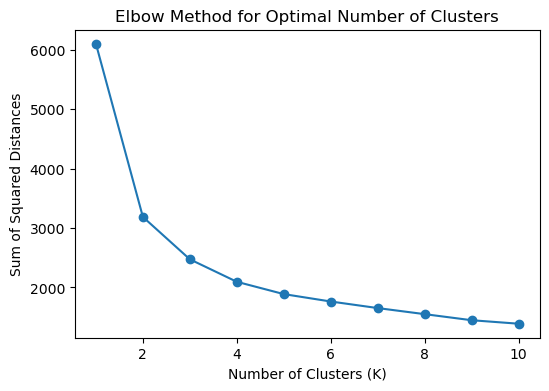

In [16]:
 # Plot the Elbow method
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.show()

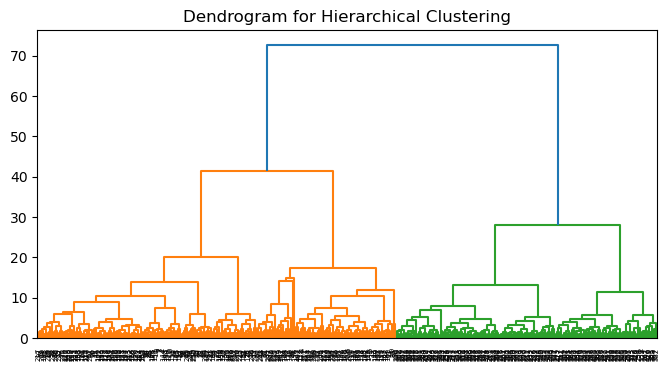

In [17]:
# Create a dendrogram to determine the optimal number of clusters
linked = linkage(df_standardized, method='ward')
plt.figure(figsize=(8, 4))  # Specify both width and height
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


In [18]:
# Based on the dendrogram,i chose the optimal number of clusters 3 and fit Hierarchical Clustering
optimal_clusters_hierarchical = 3 
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters_hierarchical)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df_standardized)


In [19]:
# Evaluate the clusters
print("\nSilhouette Score for K-Means:", silhouette_score(df_standardized, df['KMeans_Cluster']))
print("Silhouette Score for Hierarchical Clustering:",
      silhouette_score(df_standardized, df['Hierarchical_Cluster']))


Silhouette Score for K-Means: 0.3133433867690859
Silhouette Score for Hierarchical Clustering: 0.30587721195944356



Visualizing Clusters:


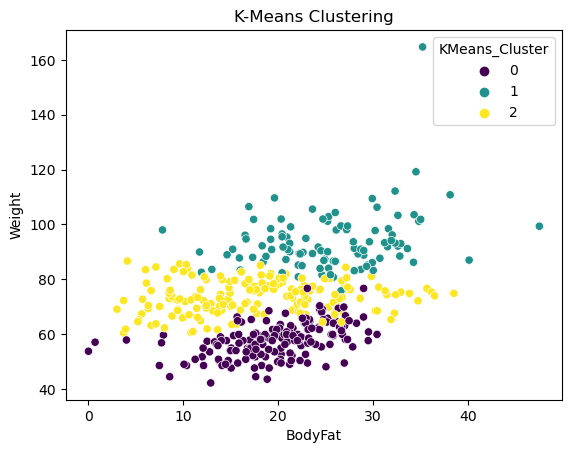

In [20]:
# Visualize the clusters
print("\nVisualizing Clusters:")
# Plot K-Means clusters
sns.scatterplot(data=df, x='BodyFat', y='Weight', hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()

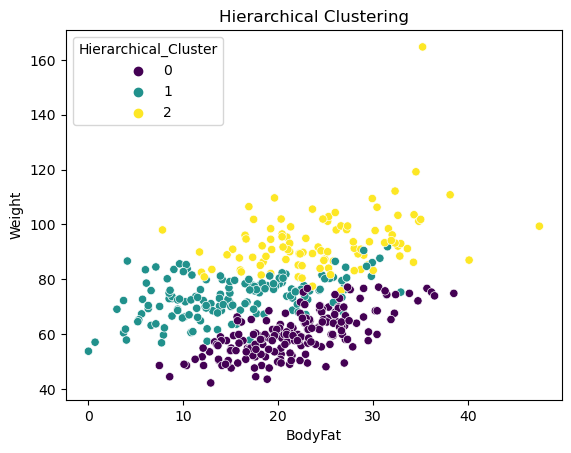

In [21]:
# Plot Hierarchical Clustering clusters
sns.scatterplot(data=df, x='BodyFat', y='Weight', hue='Hierarchical_Cluster', palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

In [22]:
# Display the first few rows with cluster labels
print(df.head())

   BodyFat Original Sex   Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     12.3        Y   M  23.0   69.97    1.72  36.2   93.1     85.2   94.5   
1      6.1        Y   M  22.0   78.59    1.84  38.5   93.6     83.0   98.7   
2     25.3        Y   M  22.0   69.85    1.68  34.0   95.8     87.9   99.2   
3     10.4        Y   M  26.0   83.80    1.84  37.4  101.8     86.4  101.2   
4     28.7        Y   M  24.0   83.58    1.81  34.4   97.3    100.0  101.9   

   Thigh  Knee  Ankle  Biceps  Forearm  Wrist  KMeans_Cluster  \
0   59.0  37.3   21.9    32.0     27.4   17.1               2   
1   58.7  37.3   23.4    30.5     28.9   18.2               2   
2   59.6  38.9   24.0    28.8     25.2   16.6               2   
3   60.1  37.3   22.8    32.4     29.4   18.2               2   
4   63.2  42.2   24.0    32.2     27.7   17.7               1   

   Hierarchical_Cluster  
0                     1  
1                     1  
2                     0  
3                     1  
4         

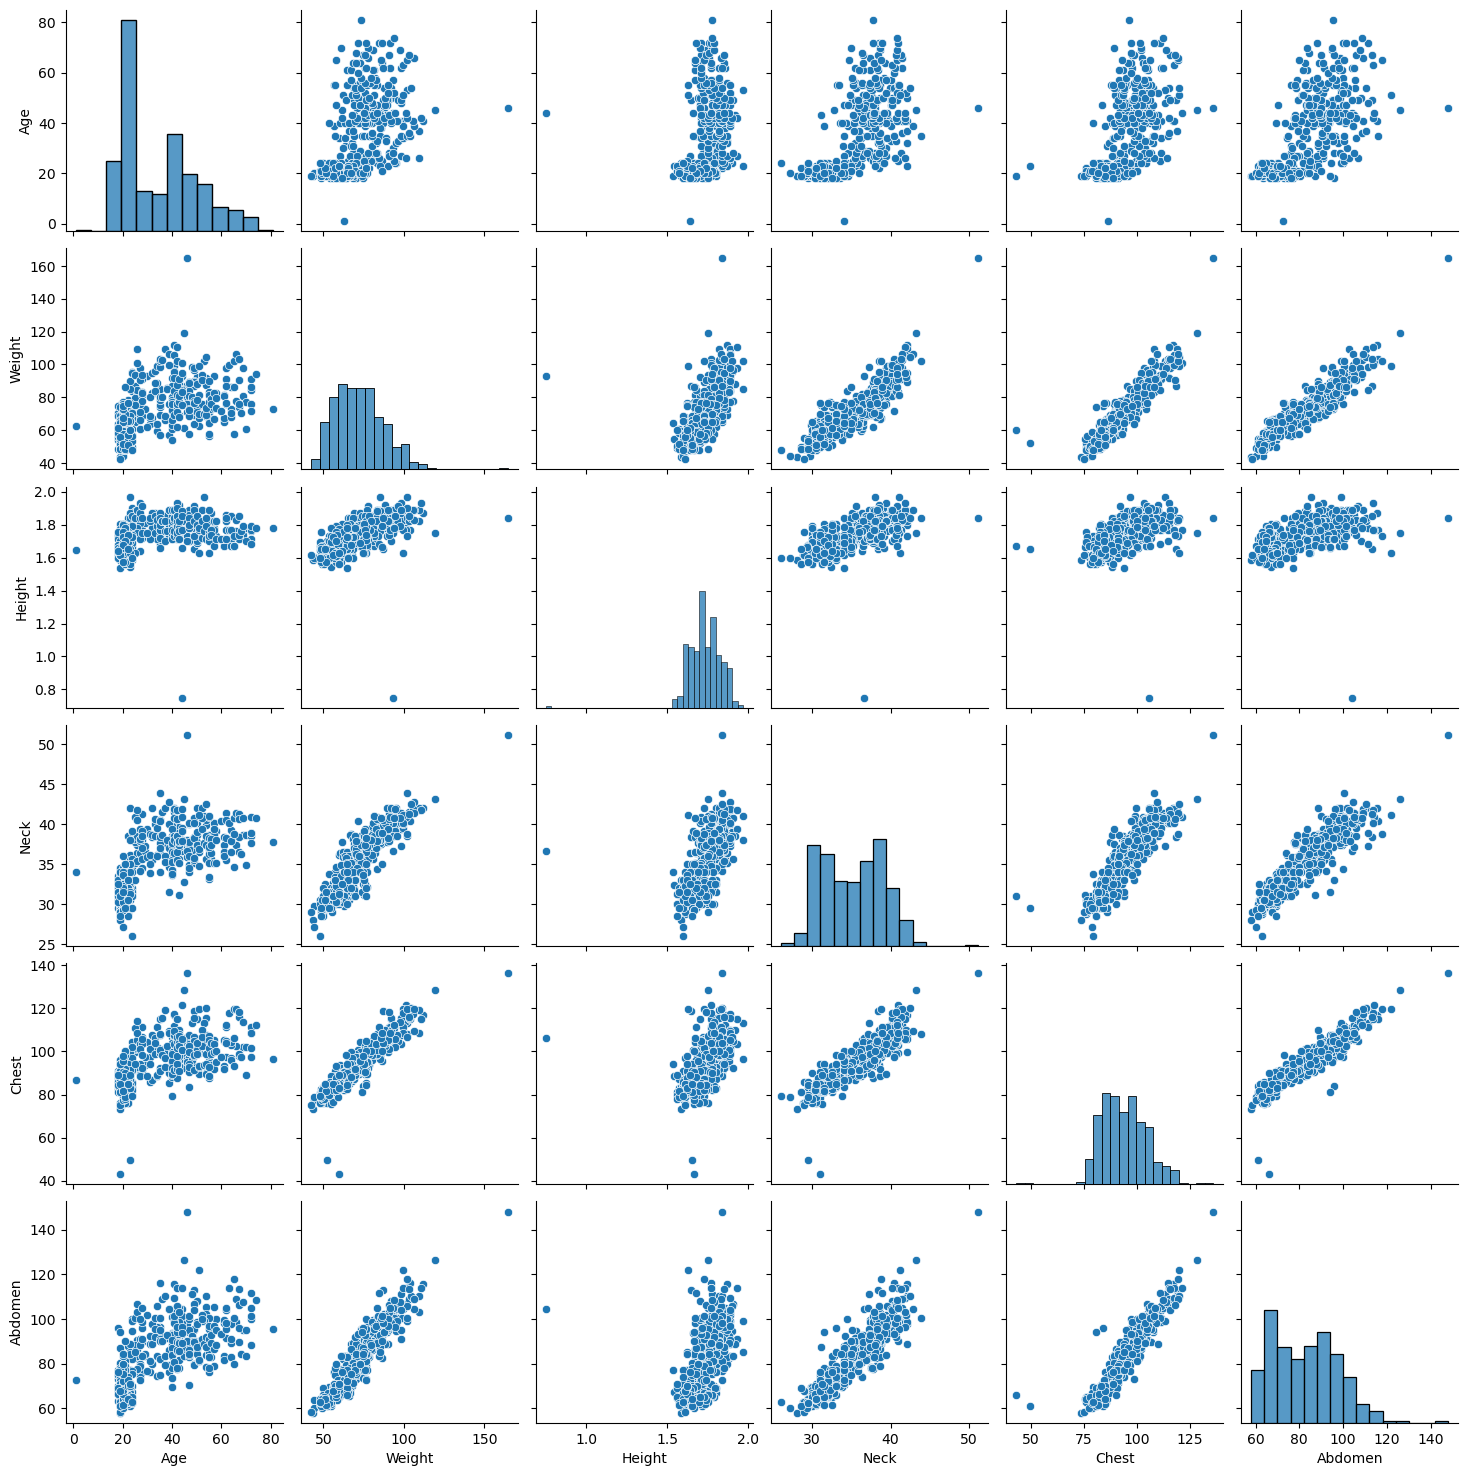

In [23]:
# Create a pair plot
df = df.iloc[:,1:9]
sns.pairplot(df)

In [24]:
# Specify the number of components i want to keep 
n_components = 2

In [25]:
# Instantiate the PCA object
pca = PCA(n_components=n_components)

In [26]:
# Fit and transform the data using PCA
X_pca = pca.fit_transform(df_standardized)

In [27]:
# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.68761743 0.11502718]


In [28]:
sum(explained_variance_ratio)

0.8026446090142919

In [29]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(X_pca, columns=['BodyFat', 'Weight'])

In [30]:
# Add the K-Means cluster labels to the DataFrame
pca_df['BodyFat'] = df['Weight']

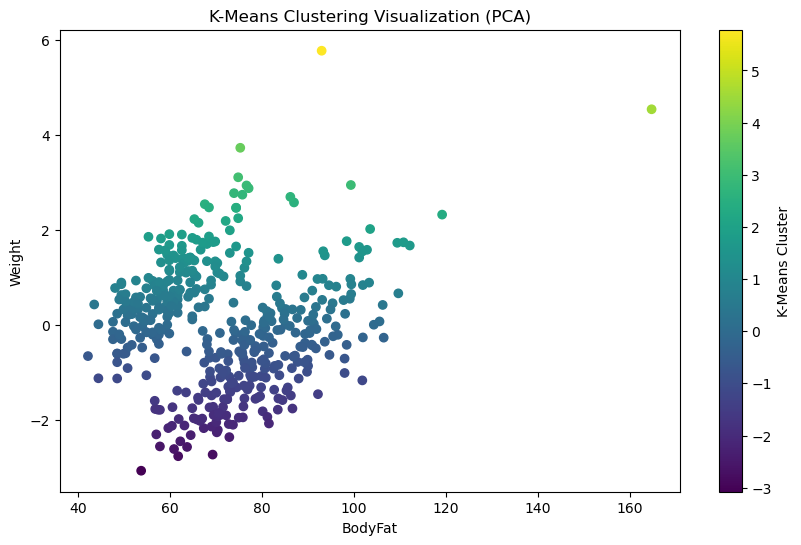

In [31]:
# Assuming 'pca_df' is the DataFrame after applying PCA and the column name for K-Means labels is 'KMeans_Cluster'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['BodyFat'], pca_df['Weight'], c=pca_df['Weight'], cmap='viridis')
plt.title('K-Means Clustering Visualization (PCA)')
plt.xlabel('BodyFat')
plt.ylabel('Weight')
plt.colorbar(scatter, label='K-Means Cluster')
plt.show()

In [32]:
# Based on the Elbow method, i have the optimal K and fit my K-Means
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_standardized)

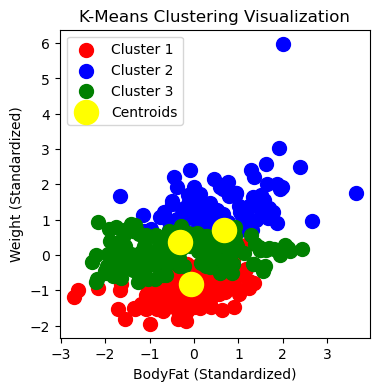

In [33]:
# Assuming 'df_standardized' is the standardized feature matrix and 'y_kmeans' is the K-Means cluster labels
plt.figure(figsize=(4, 4))
plt.scatter(df_standardized['BodyFat'][df['KMeans_Cluster'] == 0], df_standardized['Weight'][df['KMeans_Cluster'] == 0], s=100, c='red', label='Cluster 1')
plt.scatter(df_standardized['BodyFat'][df['KMeans_Cluster'] == 1], df_standardized['Weight'][df['KMeans_Cluster'] == 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_standardized['BodyFat'][df['KMeans_Cluster'] == 2], df_standardized['Weight'][df['KMeans_Cluster'] == 2], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-Means Clustering Visualization')
plt.xlabel('BodyFat (Standardized)')
plt.ylabel('Weight (Standardized)')
plt.legend()
plt.show()

In [34]:
# performing dimentional pca reduction and scatter plot

In [35]:
# Perform PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df_standardized)

In [36]:
# Perform K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(df_standardized)

In [37]:
# Visualize the clusters in the reduced-dimensional space
colours = ['Red', 'Blue', 'Green']

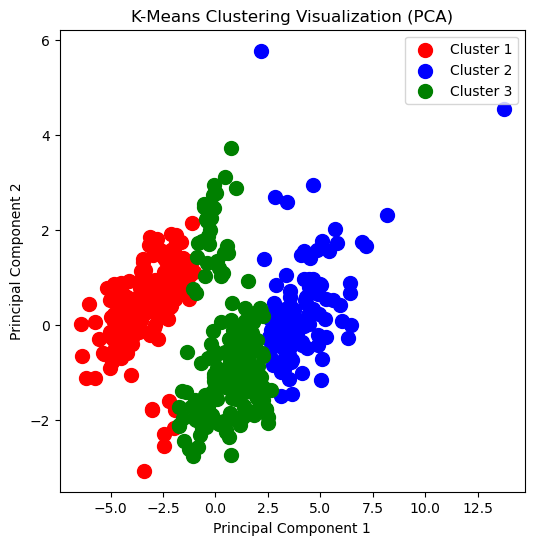

In [38]:
plt.figure(figsize=(6, 6))
for i in range(num_clusters):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1],
                s=100, c=colours[i], label='Cluster ' + str(i + 1))
plt.title('K-Means Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()